In [205]:
import numpy as np
from math import sin, cos, tan, pi, sqrt, factorial, fabs, acos

from numpy.fft import fft
from numpy import complex128, float64
import time
import pyfftw
from pyfftw.pyfftw import FFTW

In [220]:
Lmax = 6

In [55]:
a_coef = np.random.normal(size = (Lmax+1, Lmax+1))
b_coef = np.random.normal(size = (Lmax+1, Lmax+1))

#a_coef = np.ones((Lmax+1, Lmax+1))
#b_coef = np.ones((Lmax+1, Lmax+1))

a_coef[0][0] = 0.0

for m in xrange(0, Lmax+1):
    for l in xrange(0, m):
        a_coef[m][l] = 0.0     
        
for m in xrange(0, Lmax+1):
    for l in xrange(0, m):
        b_coef[m][l] = 0.0
        
for l in xrange(0, Lmax+1):
        b_coef[0][l] = 0.0

In [56]:
N = 512

field = np.zeros((N, N/2))
x = np.zeros((N, N/2))
y = np.zeros((N, N/2))

In [57]:
time0 = time.clock()
for j in xrange(0, N/2):
    
        teta = 2*pi*j/float(N)
        
        P_ = np.zeros((Lmax+1, Lmax+1))
        
        P_[0][0] = 1/sqrt(4*pi)
        
        for m in xrange(1, Lmax+1):
            P_[m][m] = P_[m-1][m-1]*(-sin(teta))*sqrt(2*m+3)/sqrt(2*m+2)
        
        for m in xrange(0, Lmax):
            P_[m][m+1] = P_[m][m]*cos(teta)*sqrt(2*m+3)
            
        for m in xrange(0, Lmax-1):
            for l in xrange(m+2, Lmax+1):
                P_[m][l] = sqrt((2*l+1)*(l-1-m))/sqrt(l**2-m**2)*(cos(teta)*sqrt(2*l-1)/sqrt(l-1-m)*P_[m][l-1] - sqrt(l+m-1)/sqrt(2*l-3)*P_[m][l-2])
                
        F = np.zeros((N+1))
        F_ = np.zeros((N+1))     
        
        func1 = 0.0
        func2 = 0.0
        
        for m in xrange(0, Lmax+1):
            for l in xrange(m, Lmax+1):
                func1 = func1 + a_coef[m][l]*P_[m][l]
                func2 = func2 + b_coef[m][l]*P_[m][l]
    
            F[m] = func1
            F_[m] = func2
                
            func1 = 0.0
            func2 = 0.0
    
        T = np.real(fft(F)) + np.imag(fft(F_))
        
        for i in xrange(0, N):
            phi = pi*i*2/float(N)
           
            field[i][j] = T[i]
            
            x[i][j] = (i-N/2)*2/float(N)*pi
            y[i][j] = teta - pi/2*(N/4)*4/float(N)
time1 = time.clock()

In [58]:
time1-time0

2.9770330000000023

In [59]:
field.shape

(512, 256)

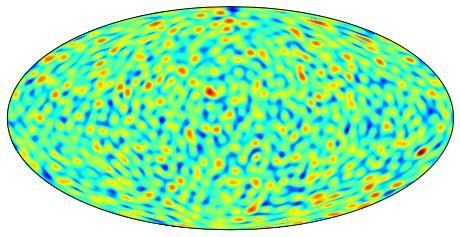

In [60]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

RAD = 180/np.pi

plt.figure(figsize=(8,4))
m = Basemap(projection='moll',lon_0=0,resolution='c')
#m.contour(X*RAD, Y*RAD, Z, 10, colors='k',latlon=True)
m.contourf(x*RAD, y*RAD, field, 100, cmap=plt.cm.jet,latlon=True)

plt.show()

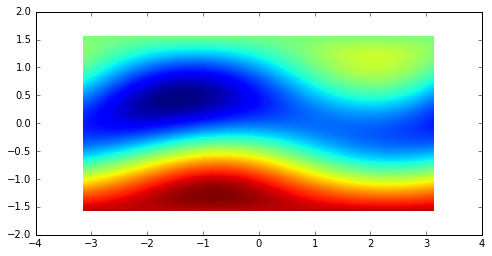

In [12]:
plt.figure(figsize=(8,4))
ax = plt.pcolormesh(x, y, field)
plt.show()

FFTW test

In [14]:
pyfftw.interfaces.cache.enable()

In [23]:
time0 = time.clock()
for j in xrange(0, N/2):
    
        teta = 2*pi*j/float(N)
        
        P_ = np.zeros((Lmax+1, Lmax+1))
        
        P_[0][0] = 1/sqrt(4*pi)
        
        for m in xrange(1, Lmax+1):
            P_[m][m] = P_[m-1][m-1]*(-sin(teta))*sqrt(2*m+3)/sqrt(2*m+2)
        
        for m in xrange(0, Lmax):
            P_[m][m+1] = P_[m][m]*cos(teta)*sqrt(2*m+3)
            
        for m in xrange(0, Lmax-1):
            for l in xrange(m+2, Lmax+1):
                P_[m][l] = sqrt((2*l+1)*(l-1-m))/sqrt(l**2-m**2)*(cos(teta)*sqrt(2*l-1)/sqrt(l-1-m)*P_[m][l-1] - sqrt(l+m-1)/sqrt(2*l-3)*P_[m][l-2])
                
        F = complex128(np.zeros((N+1)))
        F_ = complex128(np.zeros((N+1)))   
        
        func1 = 0.0
        func2 = 0.0
        
        for m in xrange(0, Lmax+1):
            for l in xrange(m, Lmax+1):
                func1 = func1 + a_coef[m][l]*P_[m][l]
                func2 = func2 + b_coef[m][l]*P_[m][l]
    
            F[m] = func1
            F_[m] = func2
                
            func1 = 0.0
            func2 = 0.0
            
        T = np.real(pyfftw.interfaces.numpy_fft.fft(F)) + np.imag(pyfftw.interfaces.numpy_fft.fft(F_))
        
        for i in xrange(0, N):
            phi = pi*i*2/float(N)
           
            field[i][j] = T[i]
            
            x[i][j] = (i-N/2)*2/float(N)*pi
            y[i][j] = teta - pi/2*(N/4)*4/float(N)
time1 = time.clock()

In [24]:
time1-time0

0.7380320000000005

In [25]:
field.shape

(512, 256)

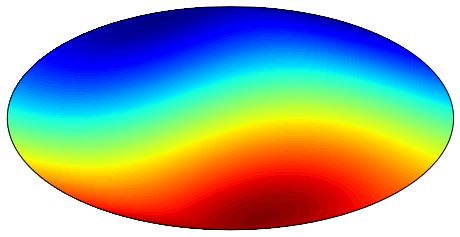

In [26]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

RAD = 180/np.pi

plt.figure(figsize=(8,4))
m = Basemap(projection='moll',lon_0=0,resolution='c')
#m.contour(X*RAD, Y*RAD, Z, 10, colors='k',latlon=True)
m.contourf(x*RAD, y*RAD, field, 100, cmap=plt.cm.jet,latlon=True)

plt.show()

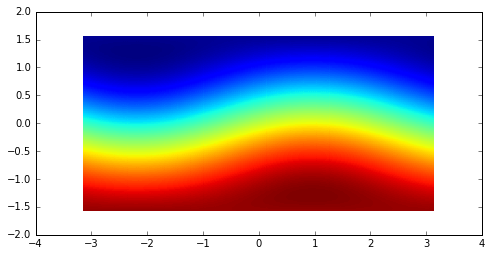

In [27]:
plt.figure(figsize=(8,4))
ax = plt.pcolormesh(x, y, field)
plt.show()

In [28]:
level = 0.0
f = field

In [29]:
# S
area = 0.0
narea = 0.0


for i in xrange(0, N-1):
    for j in xrange(1, N/2-1):
        if ((f[i][j] + f[i+1][j+1] + f[i+1][j] + f[i][j+1])/4.0 > level):
            area = area + fabs(sin(y[i][j]))
            
for i in xrange(0, N-1):
    for j in xrange(1, N/2-1):
            narea = narea + fabs(sin(y[i][j]))            

area = area/narea
print area

0.502577181673


In [30]:
# l

l = 0.0
n = 0.0
nl = 0.0

f = field - level

teta = y
phi = x

for i in xrange(0, N-1):
    for j in xrange(0, N/2-1):
        
        
        h_teta = y[N/2+1][N/4+1]
        h_phi = fabs(x[i][0] - x[i+1][0])
        
        sql = 0.0
         
        phi1 = 0.0
        phi2 = 0.0
        teta1 = 0.0
        teta2 = 0.0
        
        if (f[i][j]*f[i][j+1] < 0.0):
                    
            if (f[i][j]*f[i+1][j] < 0.0):
                
                phi1 = phi[i][j]
                teta1 = teta[i][j] + h_teta*fabs(f[i][j])/(fabs(f[i][j]) + fabs(f[i][j+1]))
            
                teta2 = teta[i][j]
                phi2 = phi[i][j] + h_phi*fabs(f[i][j])/(fabs(f[i][j]) + fabs(f[i+1][j]))
                
                #sq = [cos(teta1)*sin(phi1)*sin(teta2) - sin(teta1)*cos(teta2)*sin(phi2), sin(teta1)*cos(teta2)*cos(phi2) - cos(teta1)*cos(phi1)*sin(teta2), cos(teta1)*cos(phi1)*cos(teta2)*sin(phi2) - cos(teta1)*sin(phi1)*cos(teta2)*cos(phi2)]
                #sql = sqrt(sq[0]**2 + sq[1]**2 + sq[2]**2)   
                
                sql = acos(sin(teta1)*sin(teta2) + cos(teta1)*cos(teta2)*cos(phi1 - phi2))
                
                l = l + sql
            
            if (f[i+1][j]*f[i+1][j+1] < 0.0):
                
                phi1 = phi[i][j]
                teta1 = teta[i][j] + h_teta*fabs(f[i][j])/(fabs(f[i][j]) + fabs(f[i][j+1]))
                
                phi2 = phi[i+1][j]
                teta2 = teta[i+1][j] + h_teta*fabs(f[i+1][j])/(fabs(f[i+1][j]) + fabs(f[i+1][j+1]))
                
                #sq = [cos(teta1)*sin(phi1)*sin(teta2) - sin(teta1)*cos(teta2)*sin(phi2), sin(teta1)*cos(teta2)*cos(phi2) - cos(teta1)*cos(phi1)*sin(teta2), cos(teta1)*cos(phi1)*cos(teta2)*sin(phi2) - cos(teta1)*sin(phi1)*cos(teta2)*cos(phi2)]
                #sql = sqrt(sq[0]**2 + sq[1]**2 + sq[2]**2)   
                
                sql = acos(sin(teta1)*sin(teta2) + cos(teta1)*cos(teta2)*cos(phi1 - phi2))
                
                l = l + sql
                
            
            if (f[i][j+1]*f[i+1][j+1] < 0.0):
                
                phi1 = phi[i][j]
                teta1 = teta[i][j] + h_teta*fabs(f[i][j])/(fabs(f[i][j]) + fabs(f[i][j+1]))
                
                teta2 = teta[i][j+1]
                phi2 = phi[i][j+1] + h_phi*fabs(f[i][j+1])/(fabs(f[i][j+1]) + fabs(f[i+1][j+1]))
                
                #sq = [cos(teta1)*sin(phi1)*sin(teta2) - sin(teta1)*cos(teta2)*sin(phi2), sin(teta1)*cos(teta2)*cos(phi2) - cos(teta1)*cos(phi1)*sin(teta2), cos(teta1)*cos(phi1)*cos(teta2)*sin(phi2) - cos(teta1)*sin(phi1)*cos(teta2)*cos(phi2)]
                #sql = sqrt(sq[0]**2 + sq[1]**2 + sq[2]**2)   
                
                sql = acos(sin(teta1)*sin(teta2) + cos(teta1)*cos(teta2)*cos(phi1 - phi2))
                
                l = l + sql
                
                
            
        if (f[i][j]*f[i+1][j] < 0.0):
            
            if (f[i+1][j]*f[i+1][j+1] < 0.0):
                
                teta1 = teta[i][j]
                phi1 = phi[i][j] + h_phi*fabs(f[i][j])/(fabs(f[i][j]) + fabs(f[i+1][j]))
                
                phi2 = phi[i+1][j]
                teta2 = teta[i+1][j] + h_teta*fabs(f[i+1][j])/(fabs(f[i+1][j]) + fabs(f[i+1][j+1]))
                
                #sq = [cos(teta1)*sin(phi1)*sin(teta2) - sin(teta1)*cos(teta2)*sin(phi2), sin(teta1)*cos(teta2)*cos(phi2) - cos(teta1)*cos(phi1)*sin(teta2), cos(teta1)*cos(phi1)*cos(teta2)*sin(phi2) - cos(teta1)*sin(phi1)*cos(teta2)*cos(phi2)]
                #sql = sqrt(sq[0]**2 + sq[1]**2 + sq[2]**2)  
                
                sql = acos(sin(teta1)*sin(teta2) + cos(teta1)*cos(teta2)*cos(phi1 - phi2))
                
                l = l + sql
                
            
            if (f[i][j+1]*f[i+1][j+1] < 0.0):
                
                teta1 = teta[i][j]
                phi1 = phi[i][j] + h_phi*fabs(f[i][j])/(fabs(f[i][j]) + fabs(f[i+1][j]))
                
                teta2 = teta[i][j+1]
                phi2 = phi[i][j+1] + h_phi*fabs(f[i][j+1])/(fabs(f[i][j+1]) + fabs(f[i+1][j+1]))
                
                #sq = [cos(teta1)*sin(phi1)*sin(teta2) - sin(teta1)*cos(teta2)*sin(phi2), sin(teta1)*cos(teta2)*cos(phi2) - cos(teta1)*cos(phi1)*sin(teta2), cos(teta1)*cos(phi1)*cos(teta2)*sin(phi2) - cos(teta1)*sin(phi1)*cos(teta2)*cos(phi2)]
                #sql = sqrt(sq[0]**2 + sq[1]**2 + sq[2]**2)   
                
                sql = acos(sin(teta1)*sin(teta2) + cos(teta1)*cos(teta2)*cos(phi1 - phi2))
                
                l = l + sql
            
        if (f[i+1][j]*f[i+1][j+1] < 0.0):
            
            if (f[i][j+1]*f[i+1][j+1] < 0.0):
                
                phi1 = phi[i+1][j]
                teta1 = teta[i+1][j] + h_teta*fabs(f[i+1][j])/(fabs(f[i+1][j]) + fabs(f[i+1][j+1]))
                
                teta2 = teta[i][j+1]
                phi2 = phi[i][j+1] + h_phi*fabs(f[i][j+1])/(fabs(f[i][j+1]) + fabs(f[i+1][j+1]))
                
                #sq = [cos(teta1)*sin(phi1)*sin(teta2) - sin(teta1)*cos(teta2)*sin(phi2), sin(teta1)*cos(teta2)*cos(phi2) - cos(teta1)*cos(phi1)*sin(teta2), cos(teta1)*cos(phi1)*cos(teta2)*sin(phi2) - cos(teta1)*sin(phi1)*cos(teta2)*cos(phi2)]
                #sql = sqrt(sq[0]**2 + sq[1]**2 + sq[2]**2) 
                
                sql = acos(sin(teta1)*sin(teta2) + cos(teta1)*cos(teta2)*cos(phi1 - phi2))
                
                l = l + sql  
    
print l/pi

1.9958344617


In [31]:
# spin-weighted spherical harmonics

#----------------------------------------------------------
#
# This module computes spin-weighted spherical harmonics.
#
# Released under the MIT License.
# (C) Christian Reisswig 2009-2011
#
#----------------------------------------------------------

#def fac(n):
#    result = 1
#
#    for i in range(2, n+1):
#        result *= i
#
#    return result

# coefficient function
def Cslm(s, l, m):
    return sqrt( l*l * (4.0*l*l - 1.0) / ( (l*l - m*m) * (l*l - s*s) ) )

# recursion function
def s_lambda_lm(s, l, m, x):

    Pm = pow(-0.5, m)

    if (m !=  s): Pm = Pm * pow(1.0+x, (m-s)*1.0/2)
    if (m != -s): Pm = Pm * pow(1.0-x, (m+s)*1.0/2)
   
    Pm = Pm * sqrt( factorial(2*m + 1) * 1.0 / ( 4.0*pi * factorial(m+s) * factorial(m-s) ) )
   
    if (l == m):
        return Pm
   
    Pm1 = (x + s*1.0/(m+1) ) * Cslm(s, m+1, m) * Pm
   
    if (l == m+1):
        return Pm1
    else:
        for n in range (m+2, l+1):
      
            Pn = (x + s*m * 1.0 / ( n * (n-1.0) ) ) * Cslm(s, n, m) * Pm1 - Cslm(s, n, m) * 1.0 / Cslm(s, n-1, m) * Pm
            Pm = Pm1
            Pm1 = Pn
         
      
        return Pn

def sYlm(ss, ll, mm, theta, phi):
   
    Pm = 1.0

    l = ll
    m = mm
    s = ss

    if (l < 0):
        return 0
    if (abs(m) > l or l < abs(s)):
        return 0

    if (abs(mm) < abs(ss)):
        s=mm
        m=ss
        if ((m+s) % 2):
            Pm  = -Pm

   
    if (m < 0):
        s=-s
        m=-m
        if ((m+s) % 2):
            Pm  = -Pm

    result = Pm * s_lambda_lm(s, l, m, cos(theta))

    return complex(result * cos(mm*phi), result * sin(mm*phi))

def sYlm_fix(ss, ll, mm, theta):
   
    Pm = 1.0

    l = ll
    m = mm
    s = ss

    if (l < 0):
        return 0
    if (abs(m) > l or l < abs(s)):
        return 0

    if (abs(mm) < abs(ss)):
        s=mm
        m=ss
        if ((m+s) % 2):
            Pm  = -Pm

   
    if (m < 0):
        s=-s
        m=-m
        if ((m+s) % 2):
            Pm  = -Pm

    result = Pm * s_lambda_lm(s, l, m, cos(theta))

    return result

Сохранение P_ в памяти

In [221]:
N = 512

In [222]:
P_ = np.zeros((N/2+1, Lmax+4, Lmax+4))

for j in xrange(0, N/2):
    
    teta = 2*pi*j/float(N)
    
    P_[j][0][0] = 1/sqrt(4*pi)
    for m in xrange(1, Lmax+1):
            P_[j][m][m] = P_[j][m-1][m-1]*(-sin(teta))*sqrt(2*m+3)/sqrt(2*m+2)
    
    for m in xrange(0, Lmax):
            P_[j][m][m+1] = P_[j][m][m]*cos(teta)*sqrt(2*m+3)
    
    for m in xrange(0, Lmax-1):
            for l in xrange(m+2, Lmax+1):
                P_[j][m][l] = sqrt((2*l+1)*(l-1-m))/sqrt(l**2-m**2)*(cos(teta)*sqrt(2*l-1)/sqrt(l-1-m)*P_[j][m][l-1] - sqrt(l+m-1)/sqrt(2*l-3)*P_[j][m][l-2])

In [223]:
field = np.zeros((N, N/2))
field1dx = np.zeros((N, N/2))
field1dy = np.zeros((N, N/2))

x = np.zeros((N, N/2))
y = np.zeros((N, N/2))

In [224]:
time0 = time.clock()

for j in xrange(0, N/2):
    
    teta = 2*pi*j/float(N)
                
    F = complex128(np.zeros((N+1)))
    F_ = complex128(np.zeros((N+1)))   
        
    func1 = 0.0
    func2 = 0.0
        
    for m in xrange(0, Lmax+1):
        for l in xrange(m, Lmax+1):
            func1 = func1 + a_coef[m][l]*P_[j][m][l]
            func2 = func2 + b_coef[m][l]*P_[j][m][l]
    
        F[m] = func1
        F_[m] = func2
                
        func1 = 0.0
        func2 = 0.0
            
    T = np.real(pyfftw.interfaces.numpy_fft.fft(F)) + np.imag(pyfftw.interfaces.numpy_fft.fft(F_))
        
    for i in xrange(0, N):
        phi = pi*i*2/float(N)
           
        field[i][j] = T[i]
            
        x[i][j] = (i-N/2)*2/float(N)*pi
        y[i][j] = teta - pi/2*(N/4)*4/float(N)
            
time1 = time.clock()

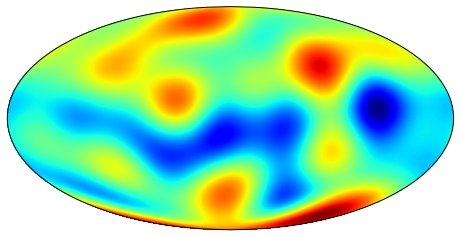

In [225]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

RAD = 180/np.pi

plt.figure(figsize=(8,4))
m = Basemap(projection='moll',lon_0=0,resolution='c')
#m.contour(X*RAD, Y*RAD, Z, 10, colors='k',latlon=True)
m.contourf(x*RAD, y*RAD, field, 512, cmap=plt.cm.jet,latlon=True)

plt.show()

In [226]:
P_1d = np.zeros((N/2+1, Lmax+1, Lmax+1))

for j in xrange(0, N/2):
    
    teta = 2*pi*j/float(N)
    
    for m in xrange(0, Lmax-1):
            for l in xrange(m, Lmax-1):
                P_1d[j][m][l] = -(1+l)*P_[j][m][l] + (1+l-m)*sqrt(float((2*l+1)*(l+1+m))/float((2*l+3)*(l+1-m)))*P_[j][m][l+1]

In [227]:
P_1d = np.zeros((N/2+1, Lmax+1, Lmax+1))

for j in xrange(0, N/2):
    
    teta = 2*pi*j/float(N)
    
    for m in xrange(0, Lmax-1):
            for l in xrange(m, Lmax-1):
                P_1d[j][m][l] = P_[j][m][l] + (1+l-m)*sqrt(float((2*l+1)*(l+1+m))/float((2*l+3)*(l+1-m)))*P_[j][m][l+1]

1d x derivative

In [228]:
time0 = time.clock()

for j in xrange(1, N/2):
    
    teta = 2*pi*j/float(N)
                
    F = complex128(np.zeros((N+1)))
    F_ = complex128(np.zeros((N+1)))   
        
    func1 = 0.0
    func2 = 0.0
        
    for m in xrange(0, Lmax+1):
        for l in xrange(m, Lmax+1):
            func1 = func1 + a_coef[m][l]*P_[j][m][l]
            func2 = func2 + b_coef[m][l]*P_[j][m][l]
    
        F[m] = func1*m
        F_[m] = func2*m
                
        func1 = 0.0
        func2 = 0.0
            
    T = -np.imag(pyfftw.interfaces.numpy_fft.fft(F)) + np.real(pyfftw.interfaces.numpy_fft.fft(F_))
        
    for i in xrange(0, N):
        phi = pi*i*2/float(N)
           
        field1dx[i][j] = T[i]/sin(teta)
            
        x[i][j] = (i-N/2)*2/float(N)*pi
        y[i][j] = teta - pi/2*(N/4)*4/float(N)
            
time1 = time.clock()

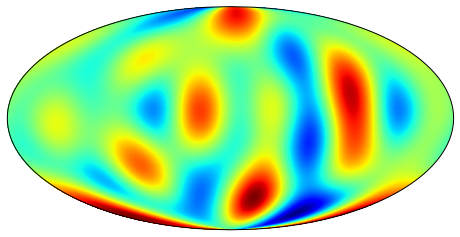

In [229]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

RAD = 180/np.pi

plt.figure(figsize=(8,4))
m = Basemap(projection='moll',lon_0=0,resolution='c')
#m.contour(X*RAD, Y*RAD, Z, 10, colors='k',latlon=True)
m.contourf(x*RAD, y*RAD, field1dx, 512, cmap=plt.cm.jet,latlon=True)

plt.show()

1d y derivative

In [230]:
time0 = time.clock()

for j in xrange(0, N/2):
    
    teta = 2*pi*j/float(N)
                
    F = complex128(np.zeros((N+1)))
    F_ = complex128(np.zeros((N+1)))   
        
    func1 = 0.0
    func2 = 0.0
        
    for m in xrange(0, Lmax+1):
        for l in xrange(m, Lmax+1):
            func1 = func1 + a_coef[m][l]*P_1d[j][m][l]
            func2 = func2 + b_coef[m][l]*P_1d[j][m][l]
    
        F[m] = func1
        F_[m] = func2
                
        func1 = 0.0
        func2 = 0.0
            
    T = np.real(pyfftw.interfaces.numpy_fft.fft(F)) + np.imag(pyfftw.interfaces.numpy_fft.fft(F_))
        
    for i in xrange(0, N):
        phi = pi*i*2/float(N)
           
        field1dy[i][j] = T[i]
            
        x[i][j] = (i-N/2)*2/float(N)*pi
        y[i][j] = teta - pi/2*(N/4)*4/float(N)
            
time1 = time.clock()

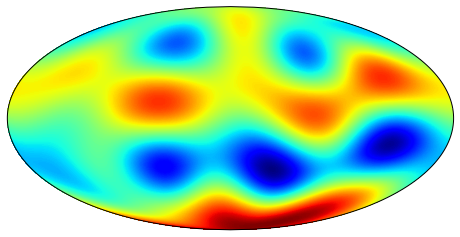

In [231]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

RAD = 180/np.pi

plt.figure(figsize=(8,4))
m = Basemap(projection='moll',lon_0=0,resolution='c')
#m.contour(X*RAD, Y*RAD, Z, 10, colors='k',latlon=True)
m.contourf(x*RAD, y*RAD, field1dy, 512, cmap=plt.cm.jet,latlon=True)

plt.show()

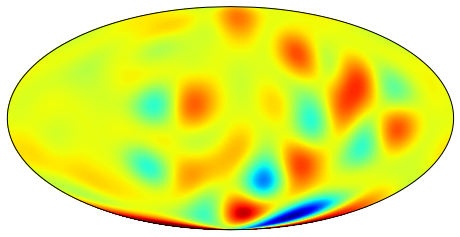

In [232]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

RAD = 180/np.pi

plt.figure(figsize=(8,4))
m = Basemap(projection='moll',lon_0=0,resolution='c')
#m.contour(X*RAD, Y*RAD, Z, 10, colors='k',latlon=True)
m.contourf(x*RAD, y*RAD, field1dy*field1dx, 512, cmap=plt.cm.jet,latlon=True)

plt.show()

In [233]:
plt.figure(figsize=(15,7))
ax = plt.pcolormesh(x, y, field)

N = field.shape[0]

z_x = np.zeros((N, N/2)) # indicators for d/dx
z_y = np.zeros((N, N/2)) # indicators for d/dy

f_x = field1dx
f_y = field1dy

for i in xrange(0, N - 1):
    for j in xrange(0, N / 2 - 1):

        if (f_x[i][j] * f_x[i][j + 1] < 0.0):

            if (f_x[i][j] * f_x[i + 1][j] < 0.0):
                z_x[i][j] = 1

            if (f_x[i + 1][j] * f_x[i + 1][j + 1] < 0.0):
                z_x[i][j] = 1

            if (f_x[i][j + 1] * f_x[i + 1][j + 1] < 0.0):
                z_x[i][j] = 1

        if (f_x[i][j] * f_x[i + 1][j] < 0.0):

            if (f_x[i + 1][j] * f_x[i + 1][j + 1] < 0.0):
                z_x[i][j] = 1

            if (f_x[i][j + 1] * f_x[i + 1][j + 1] < 0.0):
                z_x[i][j] = 1

        if (f_x[i + 1][j] * f_x[i + 1][j + 1] < 0.0):

            if (f_x[i][j + 1] * f_x[i + 1][j + 1] < 0.0):
                z_x[i][j] = 1


for i in xrange(0, N - 1):
    for j in xrange(0, N / 2 - 1):

        if (f_y[i][j] * f_y[i][j + 1] < 0.0):

            if (f_y[i][j] * f_y[i + 1][j] < 0.0):
                z_y[i][j] = 1

            if (f_y[i + 1][j] * f_y[i + 1][j + 1] < 0.0):
                z_y[i][j] = 1

            if (f_y[i][j + 1] * f_y[i + 1][j + 1] < 0.0):
                z_y[i][j] = 1

        if (f_y[i][j] * f_y[i + 1][j] < 0.0):

            if (f_y[i + 1][j] * f_y[i + 1][j + 1] < 0.0):
                z_y[i][j] = 1

            if (f_y[i][j + 1] * f_y[i + 1][j + 1] < 0.0):
                z_y[i][j] = 1

        if (f_y[i + 1][j] * f_y[i + 1][j + 1] < 0.0):

            if (f_y[i][j + 1] * f_y[i + 1][j + 1] < 0.0):
                z_y[i][j] = 1

for i in xrange(0, N - 1):
    for j in xrange(0, N / 2 - 1):
        if ((z_x * z_y)[i][j] != 0):
             plt.plot(x[i][j], y[i][j], 'kx', ms = 5)

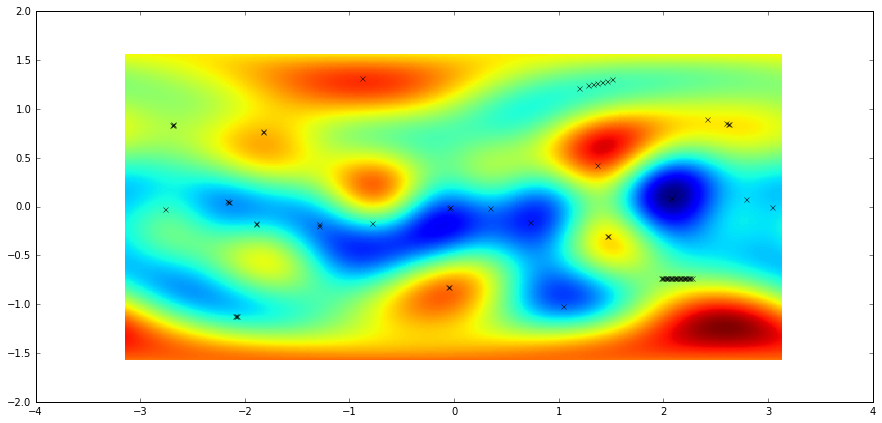

In [234]:
plt.show()

In [235]:
P_1d = np.zeros((N/2+1, Lmax+1, Lmax+1))

for j in xrange(0, N/2):
    
    teta = 2*pi*j/float(N)
    
    for m in xrange(0, Lmax-1):
            for l in xrange(m, Lmax-1):
                P_1d[j][m][l] = -(1+l)*P_[j][m][l] + (1+l-m)*sqrt(float((2*l+1)*(l+1+m))/float((2*l+3)*(l+1-m)))*P_[j][m][l+1]

In [244]:
P_2d = np.zeros((N/2+1, Lmax+1, Lmax+1))

for j in xrange(0, N/2):
    
    teta = 2*pi*j/float(N)
    
    for m in xrange(0, Lmax-1):
            for l in xrange(m, Lmax-1):
                P_2d[j][m][l] = (1+l)*(1+(2+l)*cos(teta)**2)*P_[j][m][l] + (1+l-m)*(-(5+2*l)*P_[j][m][l+1]*sqrt(float((2*l+1)*(l+1+m)*(l+2+m))/float((2*l+3)*(l+1-m))) + (2+l-m)*P_[j][m][l+2]*sqrt(float((2*l+1)*(l+1+m))/float((2*l+5)*(l+1-m)*(l+2-m))))  

2d xx derivative

In [245]:
field2dxx = np.zeros((N, N/2))

x = np.zeros((N, N/2))
y = np.zeros((N, N/2))

In [246]:
time0 = time.clock()

for j in xrange(1, N/2):
    
    teta = 2*pi*j/float(N)
                
    F = complex128(np.zeros((N+1)))
    F_ = complex128(np.zeros((N+1)))   
        
    func1 = 0.0
    func2 = 0.0
        
    for m in xrange(0, Lmax+1):
        for l in xrange(m, Lmax+1):
            func1 = func1 + a_coef[m][l]*P_[j][m][l]
            func2 = func2 + b_coef[m][l]*P_[j][m][l]
    
        F[m] = func1*m**2
        F_[m] = func2*m**2
                
        func1 = 0.0
        func2 = 0.0
            
    Tphiphi = -np.real(pyfftw.interfaces.numpy_fft.fft(F)) + -np.imag(pyfftw.interfaces.numpy_fft.fft(F_))
    
    F = complex128(np.zeros((N+1)))
    F_ = complex128(np.zeros((N+1)))   
        
    func1 = 0.0
    func2 = 0.0
        
    for m in xrange(0, Lmax+1):
        for l in xrange(m, Lmax+1):
            func1 = func1 + a_coef[m][l]*P_1d[j][m][l]
            func2 = func2 + b_coef[m][l]*P_1d[j][m][l]
    
        F[m] = func1
        F_[m] = func2
                
        func1 = 0.0
        func2 = 0.0
            
    Tteta = np.real(pyfftw.interfaces.numpy_fft.fft(F)) + np.imag(pyfftw.interfaces.numpy_fft.fft(F_))
    
        
    for i in xrange(0, N):
        phi = pi*i*2/float(N)
           
        field2dxx[i][j] = Tphiphi[i]/sin(teta)**2 - Tteta[i]*(cos(teta)/sin(teta))
            
        x[i][j] = (i-N/2)*2/float(N)*pi
        y[i][j] = teta - pi/2*(N/4)*4/float(N)
            
time1 = time.clock()

2d yy derivative

In [247]:
field2dyy = np.zeros((N, N/2))

x = np.zeros((N, N/2))
y = np.zeros((N, N/2))

In [248]:
time0 = time.clock()

for j in xrange(1, N/2):
    
    teta = 2*pi*j/float(N)
                
    F = complex128(np.zeros((N+1)))
    F_ = complex128(np.zeros((N+1)))   
        
    for m in xrange(0, Lmax+1):
        for l in xrange(m, Lmax+1):
            func1 = func1 + a_coef[m][l]*P_2d[j][m][l]
            func2 = func2 + b_coef[m][l]*P_2d[j][m][l]
    
        F[m] = func1
        F_[m] = func2
                
        func1 = 0.0
        func2 = 0.0
            
    Ttetateta = np.real(pyfftw.interfaces.numpy_fft.fft(F)) + np.imag(pyfftw.interfaces.numpy_fft.fft(F_))
    
        
    for i in xrange(0, N):
        phi = pi*i*2/float(N)
           
        field2dyy[i][j] = Ttetateta[i]
            
        x[i][j] = (i-N/2)*2/float(N)*pi
        y[i][j] = teta - pi/2*(N/4)*4/float(N)
            
time1 = time.clock()

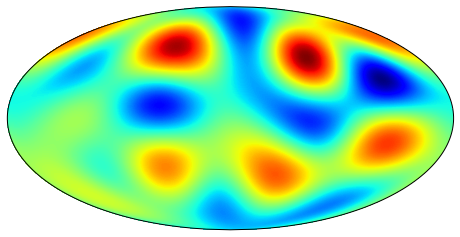

In [249]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

RAD = 180/np.pi

plt.figure(figsize=(8,4))
m = Basemap(projection='moll',lon_0=0,resolution='c')
#m.contour(X*RAD, Y*RAD, Z, 10, colors='k',latlon=True)
m.contourf(x*RAD, y*RAD, field2dyy, 512, cmap=plt.cm.jet,latlon=True)

plt.show()

2dxy derivative 

In [262]:
field2dyx = np.zeros((N, N/2))

x = np.zeros((N, N/2))
y = np.zeros((N, N/2))

In [263]:
time0 = time.clock()

for j in xrange(1, N/2):
    
    teta = 2*pi*j/float(N)
                
    F = complex128(np.zeros((N+1)))
    F_ = complex128(np.zeros((N+1)))   
        
    for m in xrange(0, Lmax+1):
        for l in xrange(m, Lmax+1):
            func1 = func1 + a_coef[m][l]*P_1d[j][m][l]
            func2 = func2 + b_coef[m][l]*P_1d[j][m][l]
    
        F[m] = func1*m
        F_[m] = func2*m
                
        func1 = 0.0
        func2 = 0.0
            
    Ttetaphi= -np.imag(pyfftw.interfaces.numpy_fft.fft(F)) + np.real(pyfftw.interfaces.numpy_fft.fft(F_))
    
    F = complex128(np.zeros((N+1)))
    F_ = complex128(np.zeros((N+1)))   
        
    for m in xrange(0, Lmax+1):
        for l in xrange(m, Lmax+1):
            func1 = func1 + a_coef[m][l]*P_[j][m][l]
            func2 = func2 + b_coef[m][l]*P_[j][m][l]
    
        F[m] = func1*m
        F_[m] = func2*m
                
        func1 = 0.0
        func2 = 0.0
            
    Tphi= -np.imag(pyfftw.interfaces.numpy_fft.fft(F)) + np.real(pyfftw.interfaces.numpy_fft.fft(F_))
    
        
    for i in xrange(0, N):
        phi = pi*i*2/float(N)
           
        field2dyx[i][j] = Ttetaphi[i] + Tphi[i]*cos(teta)/sin(teta)**2
            
        x[i][j] = (i-N/2)*2/float(N)*pi
        y[i][j] = teta - pi/2*(N/4)*4/float(N)
            
time1 = time.clock()

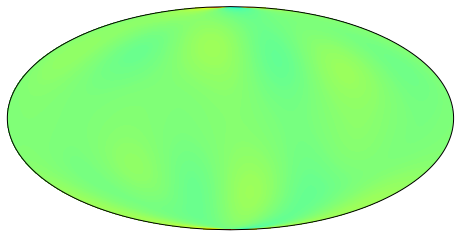

In [264]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

RAD = 180/np.pi

plt.figure(figsize=(8,4))
m = Basemap(projection='moll',lon_0=0,resolution='c')
#m.contour(X*RAD, Y*RAD, Z, 10, colors='k',latlon=True)
m.contourf(x*RAD, y*RAD, field2dyx, 512, cmap=plt.cm.jet,latlon=True)

plt.show()

In [270]:
plt.figure(figsize=(15,7))
ax = plt.pcolormesh(x, y, field)

N = field.shape[0]

z_x = np.zeros((N, N/2)) # indicators for d/dx
z_y = np.zeros((N, N/2)) # indicators for d/dy

f_x = field1dx
f_y = field1dy

for i in xrange(0, N - 1):
    for j in xrange(0, N / 2 - 1):

        if (f_x[i][j] * f_x[i][j + 1] < 0.0):

            if (f_x[i][j] * f_x[i + 1][j] < 0.0):
                z_x[i][j] = 1

            if (f_x[i + 1][j] * f_x[i + 1][j + 1] < 0.0):
                z_x[i][j] = 1

            if (f_x[i][j + 1] * f_x[i + 1][j + 1] < 0.0):
                z_x[i][j] = 1

        if (f_x[i][j] * f_x[i + 1][j] < 0.0):

            if (f_x[i + 1][j] * f_x[i + 1][j + 1] < 0.0):
                z_x[i][j] = 1

            if (f_x[i][j + 1] * f_x[i + 1][j + 1] < 0.0):
                z_x[i][j] = 1

        if (f_x[i + 1][j] * f_x[i + 1][j + 1] < 0.0):

            if (f_x[i][j + 1] * f_x[i + 1][j + 1] < 0.0):
                z_x[i][j] = 1


for i in xrange(0, N - 1):
    for j in xrange(0, N / 2 - 1):

        if (f_y[i][j] * f_y[i][j + 1] < 0.0):

            if (f_y[i][j] * f_y[i + 1][j] < 0.0):
                z_y[i][j] = 1

            if (f_y[i + 1][j] * f_y[i + 1][j + 1] < 0.0):
                z_y[i][j] = 1

            if (f_y[i][j + 1] * f_y[i + 1][j + 1] < 0.0):
                z_y[i][j] = 1

        if (f_y[i][j] * f_y[i + 1][j] < 0.0):

            if (f_y[i + 1][j] * f_y[i + 1][j + 1] < 0.0):
                z_y[i][j] = 1

            if (f_y[i][j + 1] * f_y[i + 1][j + 1] < 0.0):
                z_y[i][j] = 1

        if (f_y[i + 1][j] * f_y[i + 1][j + 1] < 0.0):

            if (f_y[i][j + 1] * f_y[i + 1][j + 1] < 0.0):
                z_y[i][j] = 1

for i in xrange(1, N - 1):
    for j in xrange(1, N / 2 - 1):
        if ((z_x * z_y)[i][j] != 0 and (field2dxx[i][j]*field2dyy[i][j] - field2dyx[i][j]*field2dyx[i][j]) < 0.0) :
             plt.plot(x[i][j], y[i][j], 'kx', ms = 5)

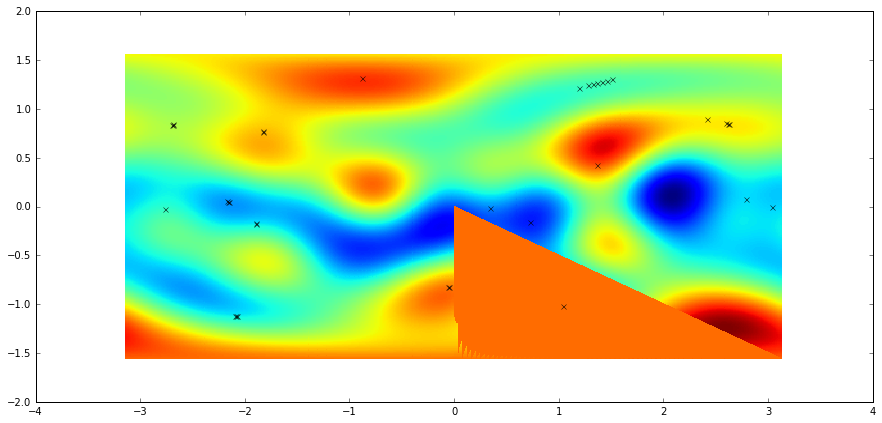

In [271]:
plt.show()